In [173]:
# База даних середньої продовжуваності життя людей в різних країнах в 1900 та 2018 роках, була сформована згідно з даних сайту
# https://mariro.livejournal.com/258064.html
import pandas as pd
data = pd.DataFrame(
{
    "Country" : ['Austria', 'Belgium', 'Great Britain', 'Germany', 'Denmark', 'Italy', 'Netherlands', 'Norway', 'France', 'Sweden'],
    "1900" : [59.3, 62.21, 61.41, 61.39, 64.62, 62.05, 63.11, 63.57, 61.18, 64.64],
    "2018" : [82.15, 81.35, 81.8, 81.3, 81.55, 83.05, 81.9, 82.7, 83.25, 82.65]
})

data

,Country,1900,2018
0,Austria,59.30,82.15
1,Belgium,62.21,81.35
2,Great Britain,61.41,81.80
3,Germany,61.39,81.30
4,Denmark,64.62,81.55
5,Italy,62.05,83.05
6,Netherlands,63.11,81.90
7,Norway,63.57,82.70
8,France,61.18,83.25
9,Sweden,64.64,82.65


{'whiskers': [<matplotlib.lines.Line2D at 0x21faa202f88>,
 'caps': [<matplotlib.lines.Line2D at 0x21faa20bd48>,
 'boxes': [<matplotlib.patches.PathPatch at 0x21faa202c48>,
 'medians': [<matplotlib.lines.Line2D at 0x21faa20bec8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21faa211e08>,
 'means': []}

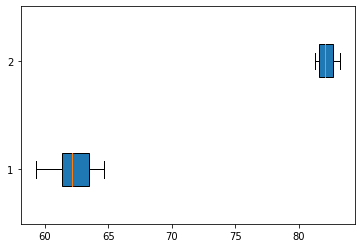

In [174]:
import matplotlib.pyplot as plt
current_data = [data["1900"], data["2018"]]
plt.boxplot(x = current_data, vert = False, patch_artist = True, widths = 0.3)

In [175]:
# підключення таблиці критичних значень кореляційного аналізу
file = 'C:/Users/Alex/Desktop/BMD/Laba6/Core_critical.xlsx'
xl = pd.ExcelFile(file)
control_critical = xl.parse('Лист1')
print(control_critical)

     df     0.05
0     1  0.99692
1     2  0.95000
2     3  0.87830
3     4  0.81140
4     5  0.75450
5     6  0.70670
6     7  0.66640
7     8  0.63190
8     9  0.60210
9    10  0.57600
10   11  0.55290
11   12  0.53240
12   13  0.51390
13   14  0.49730
14   15  0.48210
15   16  0.46830
16   17  0.45550
17   18  0.44380
18   19  0.43290
19   20  0.42270
20   21  0.41300
21   22  0.40400
22   23  0.39600
23   24  0.38800
24   25  0.38090
25   30  0.34940
26   35  0.32460
27   40  0.30440
28   45  0.28750
29   50  0.27320
30   60  0.25000
31   70  0.23190
32   80  0.21720
33   90  0.20500
34  100  0.19460
35  120  0.17800
36    ∞  0.08700


In [176]:
import math

# функція для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона
def Pirson(n):
    Result = []
    Sum_Square_1900 = 0
    Sum_Square_2018 = 0
    Sum_Product = 0
    
# цикл для підрахунку необхідних доданків для головної формули коефіцієнту r    
    for i in range(data.shape[0]):
        Sum_Product = Sum_Product + (data["1900"][i] * data["2018"][i])
        Sum_Square_1900 = Sum_Square_1900 + (data["1900"][i]) ** 2
        Sum_Square_2018 = Sum_Square_2018 + (data["2018"][i]) ** 2
    
    r = ((n * Sum_Product) - (data["1900"].sum() * data["2018"].sum()))/(math.sqrt((n * Sum_Square_1900 - (data["1900"].sum() ** 2)) * (n * Sum_Square_2018 - (data["2018"].sum() ** 2))))
    Result.append(r)

# підрахунок значення ступеня свободи Value_freedom_degree
    count = 0
    while control_critical["df"][count] < n-2:
        count += 1
    Value_freedom_degree = control_critical[0.05][count]
    Result.append(Value_freedom_degree)
    
# оцінюємо значимість зв'язку
    if abs(r) > Value_freedom_degree:
        Result.append("significant")
    else:
        Result.append("NOT significant")
    
    return Result
        
print(Pirson(data.shape[0]))

[-0.0033620825746774326, 0.6319, 'NOT significant']


In [177]:
# додаємо рядок різниць між групами
new_colum = [data["1900"][i] - data["2018"][i] for i in range(data.shape[0])]
data.insert(3, "difference", new_colum)
data

,Country,1900,2018,difference
0,Austria,59.30,82.15,-22.85
1,Belgium,62.21,81.35,-19.14
2,Great Britain,61.41,81.80,-20.39
3,Germany,61.39,81.30,-19.91
4,Denmark,64.62,81.55,-16.93
5,Italy,62.05,83.05,-21.00
6,Netherlands,63.11,81.90,-18.79
7,Norway,63.57,82.70,-19.13
8,France,61.18,83.25,-22.07
9,Sweden,64.64,82.65,-18.01


In [178]:
# підключення таблиці критичних значень для парного критерія
file = 'C:/Users/Alex/Desktop/BMD/Laba6/Couple_critical.xlsx'
xl = pd.ExcelFile(file)
control_couple = xl.parse('Лист1')
print(control_couple)

     df    0.05
0     1  12.700
1     2   4.303
2     3   3.182
3     4   2.776
4     5   2.571
..  ...     ...
86  150   1.976
87  200   1.972
88  250   1.969
89  300   1.968
90  350   1.967

[91 rows x 2 columns]


In [179]:
# функція для визначення відмінності між групами за критерієм Стьюдента
def Student(n):
    Result = []
    
# розрахунок t-критерія Стьюдента за формулою    
    t_emp = data["difference"].mean() / data["difference"].std() * math.sqrt(n)
    Result.append(t_emp)
    
# підрахунок значення ступеня свободи t_critical
    count = 0
    while control_couple["df"][count] < n-1:
        count += 1
    t_critical = control_couple[0.05][count]
    Result.append(t_critical)
    
# оцінюємо значимість зв'язку
    if abs(t_emp) > t_critical:
        Result.append("NOT significant")
    else:
        Result.append("significant")
        
    return Result
    
print(Student(data.shape[0]))

[-34.566035837139125, 2.262, 'NOT significant']


In [180]:
# Висновки
# Взаємозв'язок між групами за коефіцієнтом кореляції Пірсона знаходиться в межах [0, 0.3] а отже є дуже слабким
# Відмінність між групами за t-критерієм Стьюдента суттєва